In [74]:
import torch.utils.data as data
import os
import glob
import torch
import cv2
import numpy as np
import PIL.Image as Image
import matplotlib.pyplot as plt
from copy import deepcopy
from tqdm import tqdm
import random
import pandas as pd
from skimage import io, transform
import torchvision

In [48]:
class DataLoaderSegmentation(data.Dataset):
    def __init__(self, folder_path):
        super(DataLoaderSegmentation, self).__init__()
        self.img_files = glob.glob(os.path.join(folder_path,'og','*.tif'))
        self.mask_files = []

        # This is done to ensure that the mask files are in the same order as the image files
        for img_path in self.img_files:
             self.mask_files.append(os.path.join(folder_path,'mask',os.path.basename(img_path)))

    def __getitem__(self, index):
            img_path = self.img_files[index]
            # print(img_path)
            mask_path = self.mask_files[index]
            data = io.imread(img_path)
            label = io.imread(mask_path)
            return torch.from_numpy(data).float(), torch.from_numpy(label).float()

    def __len__(self):
        return len(self.img_files)
    
    def append(self, folder_path):
        img_files = glob.glob(os.path.join(folder_path,'og','*.tif'))
        mask_files = []
        for img_path in img_files:
            mask_files.append(os.path.join(folder_path,'mask',os.path.basename(img_path)))


        self.img_files += img_files
        self.mask_files += mask_files


In [49]:
dataset = DataLoaderSegmentation('./train/')

print(len(dataset))

dataset.append('./val/')

print(len(dataset))

485
612


torch.Size([288, 384, 3])


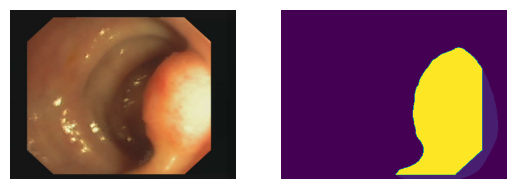

In [52]:
def entry_to_numpy(tensor_img, tensor_mask):
    return tensor_img.numpy().astype(np.uint8), tensor_mask.numpy().astype(np.uint8)

demo_image, demo_label = dataset[0]

demo_img, demo_lbl = entry_to_numpy(*dataset[0])

print(demo_image.shape)
# print(demo_label.shape)
fig, axes = plt.subplots(1,2)
for ax in axes:
    ax.set_axis_off()
axes[0].imshow(demo_img)
axes[1].imshow(demo_lbl)

plt.show()

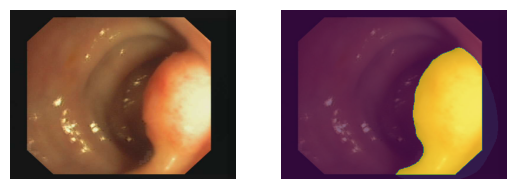

In [53]:
def plot_mask_overlay(image, mask):
    new_mask = deepcopy(mask)

    # new_mask[:,:,1] = 0
    # new_mask[:,:,2] = 0
    
    fig, axes = plt.subplots(1,2)
    for ax in axes:
        ax.set_axis_off()

    axes[0].imshow(image)
    axes[1].imshow(image)
    axes[1].imshow(new_mask, alpha=0.6)
    plt.show()
    return new_mask

colored_demo_lbl = plot_mask_overlay(demo_img, demo_lbl)

In [54]:
length = len(dataset)

  0%|          | 0/50 [00:00<?, ?it/s]

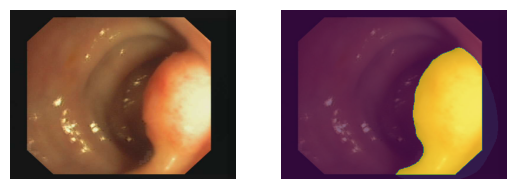

  2%|▏         | 1/50 [00:00<00:06,  7.68it/s]

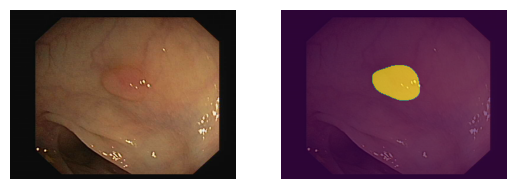

  4%|▍         | 2/50 [00:00<00:06,  7.05it/s]

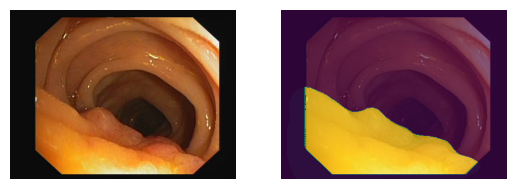

  6%|▌         | 3/50 [00:00<00:07,  6.66it/s]

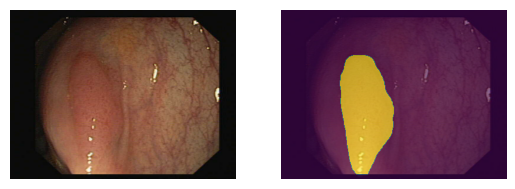

  8%|▊         | 4/50 [00:00<00:07,  6.55it/s]

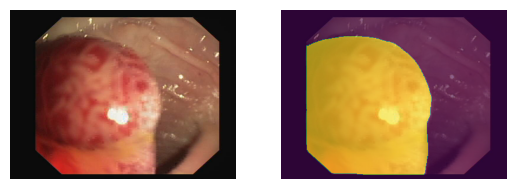

 10%|█         | 5/50 [00:00<00:06,  7.23it/s]

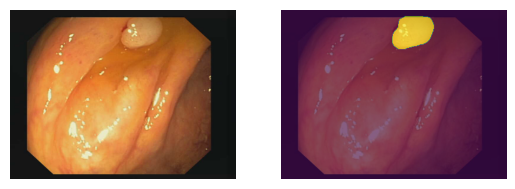

 12%|█▏        | 6/50 [00:00<00:05,  7.57it/s]

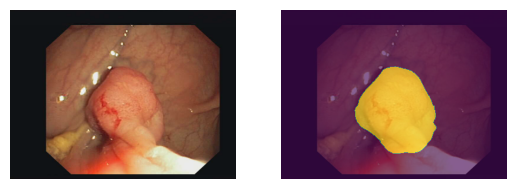

 14%|█▍        | 7/50 [00:00<00:05,  7.93it/s]

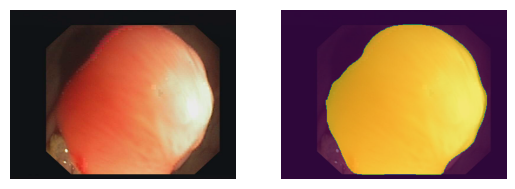

 16%|█▌        | 8/50 [00:01<00:05,  8.17it/s]

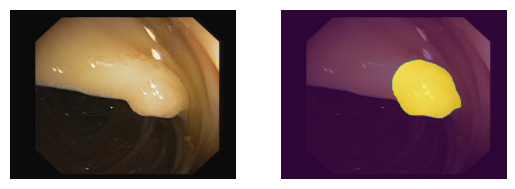

 18%|█▊        | 9/50 [00:01<00:05,  7.79it/s]

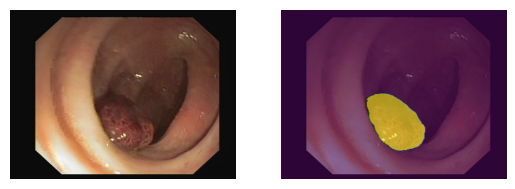

 20%|██        | 10/50 [00:01<00:04,  8.13it/s]

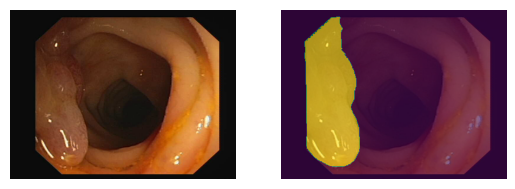

 22%|██▏       | 11/50 [00:01<00:04,  8.53it/s]

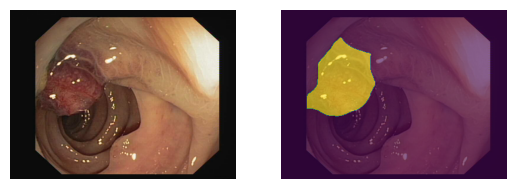

 24%|██▍       | 12/50 [00:01<00:04,  8.79it/s]

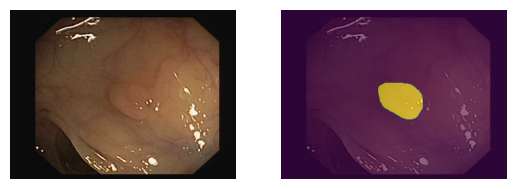

 26%|██▌       | 13/50 [00:01<00:04,  8.81it/s]

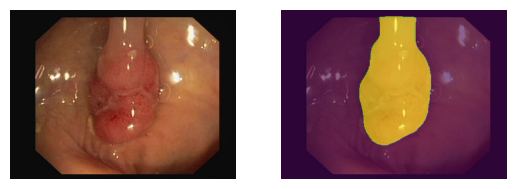

 28%|██▊       | 14/50 [00:01<00:04,  8.76it/s]

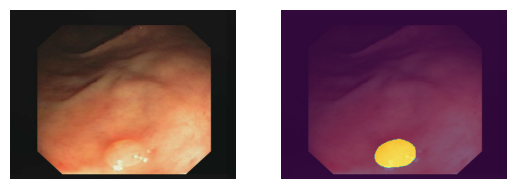

 30%|███       | 15/50 [00:01<00:03,  9.03it/s]

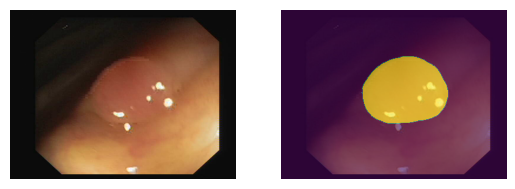

 32%|███▏      | 16/50 [00:01<00:03,  9.11it/s]

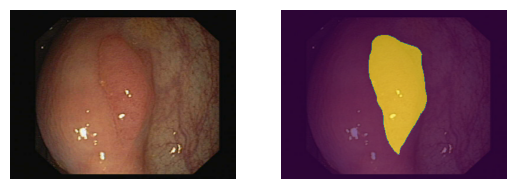

 34%|███▍      | 17/50 [00:02<00:03,  9.00it/s]

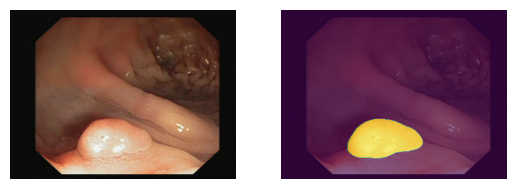

 36%|███▌      | 18/50 [00:02<00:05,  6.23it/s]

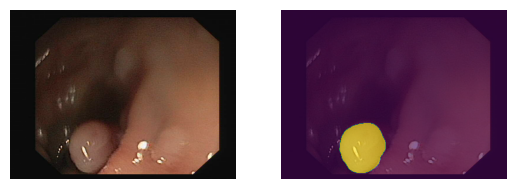

 38%|███▊      | 19/50 [00:02<00:04,  6.62it/s]

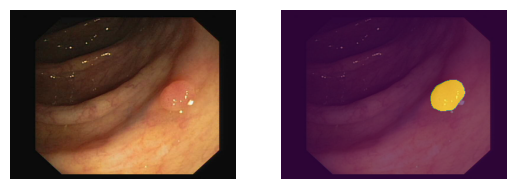

 40%|████      | 20/50 [00:02<00:04,  6.60it/s]

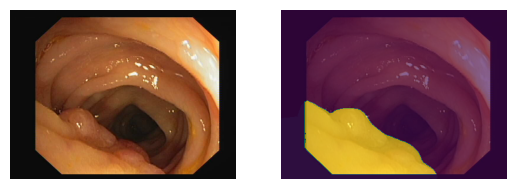

 42%|████▏     | 21/50 [00:02<00:04,  6.91it/s]

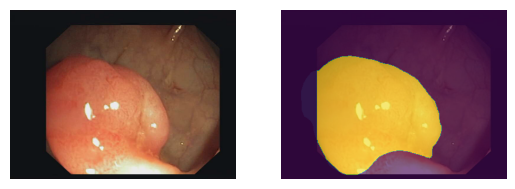

 44%|████▍     | 22/50 [00:02<00:03,  7.10it/s]

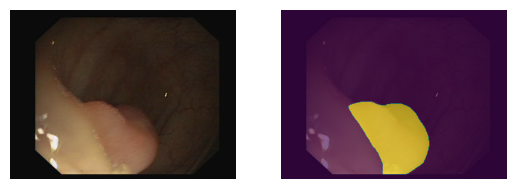

 46%|████▌     | 23/50 [00:03<00:03,  7.58it/s]

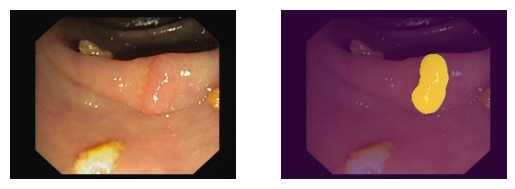

 48%|████▊     | 24/50 [00:03<00:03,  7.98it/s]

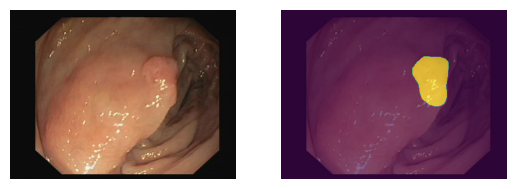

 50%|█████     | 25/50 [00:03<00:03,  8.19it/s]

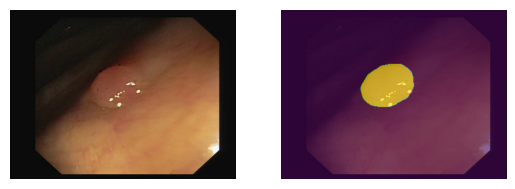

 52%|█████▏    | 26/50 [00:03<00:02,  8.62it/s]

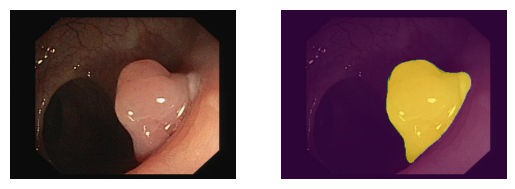

 54%|█████▍    | 27/50 [00:03<00:02,  8.83it/s]

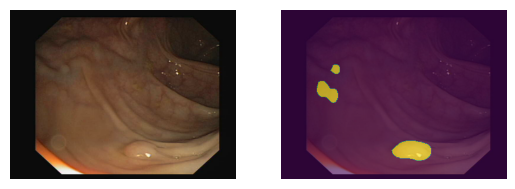

 56%|█████▌    | 28/50 [00:03<00:02,  8.35it/s]

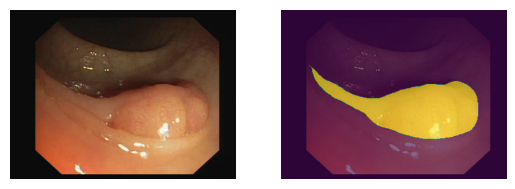

 58%|█████▊    | 29/50 [00:03<00:02,  7.20it/s]

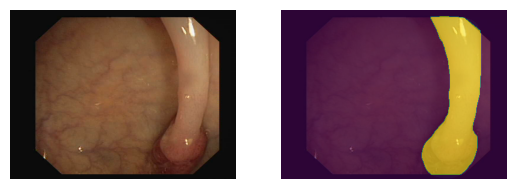

 60%|██████    | 30/50 [00:03<00:02,  7.78it/s]

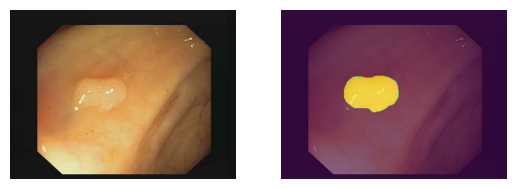

 62%|██████▏   | 31/50 [00:03<00:02,  7.81it/s]

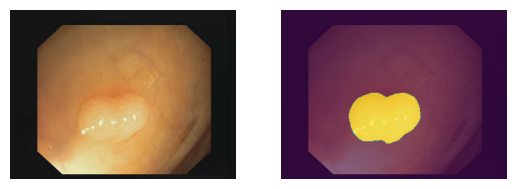

 64%|██████▍   | 32/50 [00:04<00:02,  7.98it/s]

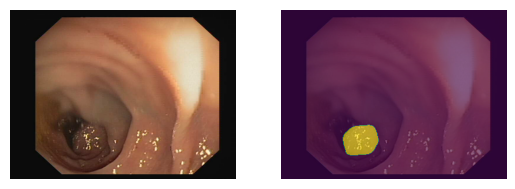

 66%|██████▌   | 33/50 [00:04<00:02,  8.07it/s]

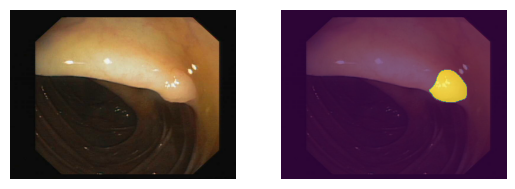

 68%|██████▊   | 34/50 [00:04<00:01,  8.43it/s]

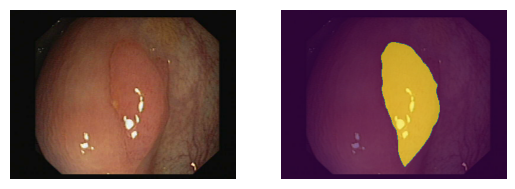

 70%|███████   | 35/50 [00:04<00:01,  8.58it/s]

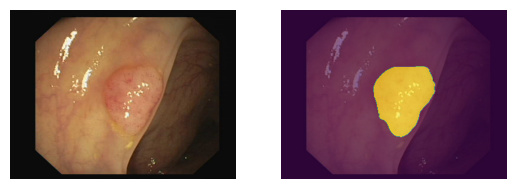

 72%|███████▏  | 36/50 [00:04<00:01,  8.38it/s]

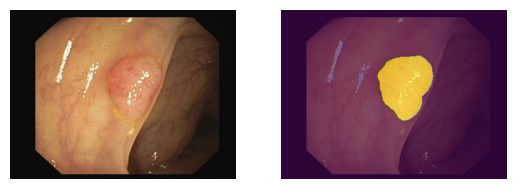

 74%|███████▍  | 37/50 [00:04<00:01,  8.67it/s]

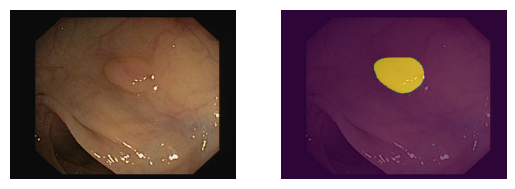

 76%|███████▌  | 38/50 [00:04<00:01,  8.72it/s]

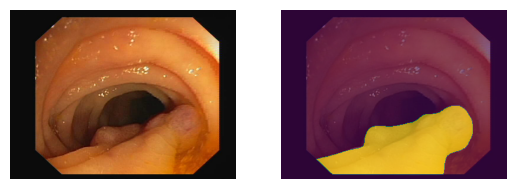

 78%|███████▊  | 39/50 [00:04<00:01,  8.66it/s]

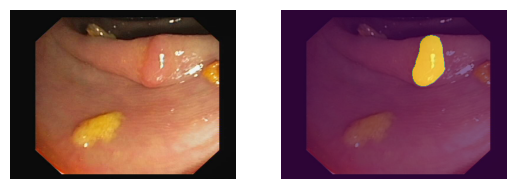

 80%|████████  | 40/50 [00:05<00:01,  8.56it/s]

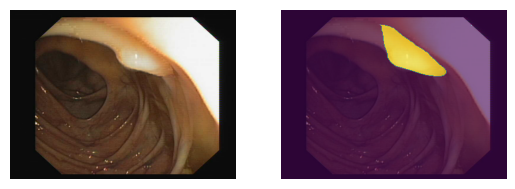

 82%|████████▏ | 41/50 [00:05<00:01,  7.80it/s]

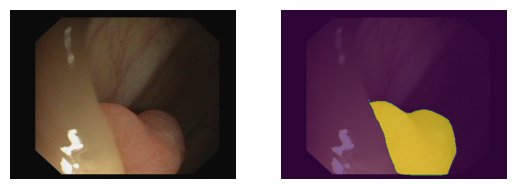

 84%|████████▍ | 42/50 [00:05<00:01,  6.81it/s]

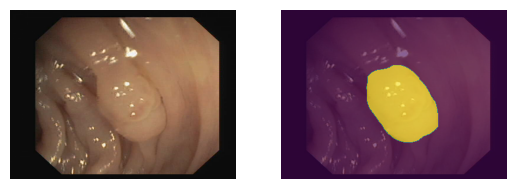

 86%|████████▌ | 43/50 [00:05<00:00,  7.31it/s]

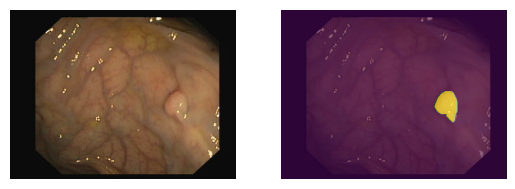

 88%|████████▊ | 44/50 [00:05<00:00,  7.79it/s]

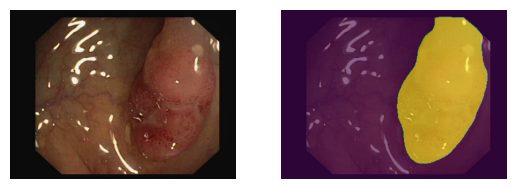

 90%|█████████ | 45/50 [00:05<00:00,  7.84it/s]

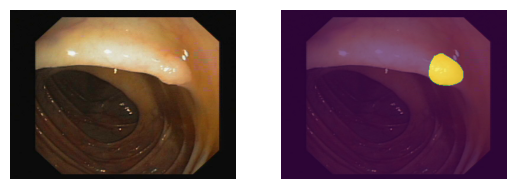

 92%|█████████▏| 46/50 [00:05<00:00,  8.03it/s]

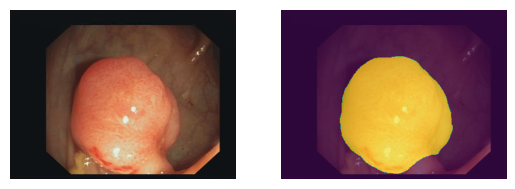

 94%|█████████▍| 47/50 [00:05<00:00,  8.00it/s]

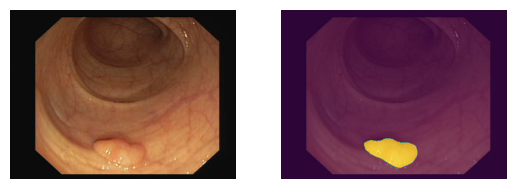

 96%|█████████▌| 48/50 [00:06<00:00,  7.98it/s]

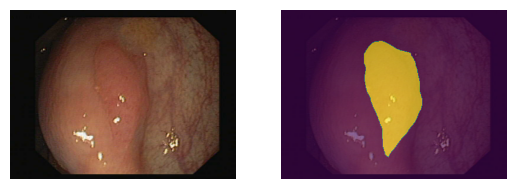

 98%|█████████▊| 49/50 [00:06<00:00,  8.18it/s]

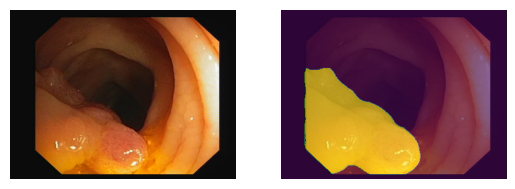

100%|██████████| 50/50 [00:06<00:00,  7.85it/s]


In [55]:
for i in tqdm(range(50)):
    # print(i)
    crt_image, crt_label = dataset[i]
    crt_img, crt_lbl = crt_image.numpy().astype(np.uint8), crt_label.numpy().astype(np.uint8)
    plot_mask_overlay(crt_img, crt_lbl)

In [56]:
image_stats = {
    'height': [],
    'width': [],
    'aspect_ratio': [],
    'masked_area': [],
    'masked_area_percentage': []
}

for i in tqdm(range(length)):
    crt_img, crt_lbl = entry_to_numpy(*dataset[i])

    height, width = crt_img.shape[:2]
    image_stats['height'].append(height)
    image_stats['width'].append(width)
    image_stats['aspect_ratio'].append(width/height)
    image_stats['masked_area'].append(np.sum(crt_lbl > 0))
    image_stats['masked_area_percentage'].append(np.sum(crt_lbl > 0)/(width * height) * 100)

100%|██████████| 612/612 [00:00<00:00, 679.55it/s]


In [57]:
stats_df = pd.DataFrame(image_stats)

stats_df.describe()

height  width  aspect_ratio   masked_area  masked_area_percentage
count   612.0  612.0    612.000000    612.000000              612.000000
mean    288.0  384.0      1.333333  10285.196078                9.300127
std       0.0    0.0      0.000000   8587.446654                7.764980
min     288.0  384.0      1.333333    373.000000                0.337276
25%     288.0  384.0      1.333333   4017.750000                3.632948
50%     288.0  384.0      1.333333   7557.500000                6.833677
75%     288.0  384.0      1.333333  14160.500000               12.804272
max     288.0  384.0      1.333333  54171.000000               48.982747

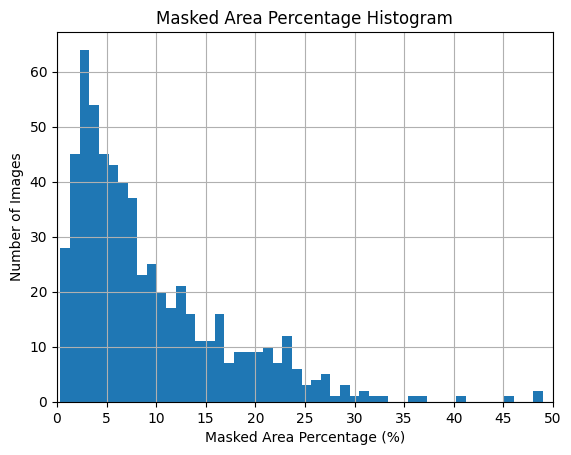

In [58]:
no_bins = 50
stats_df['masked_area_percentage'].hist(bins=no_bins)
plt.xticks(np.arange(0,55, 5))
plt.xlim(0,50)
plt.xlabel('Masked Area Percentage (%)')
plt.ylabel('Number of Images')
plt.title('Masked Area Percentage Histogram')
plt.show()

In [105]:
def min_max_normalization(image):
    '''
    Min-max normalization is a common technique used in computer vision to normalize the pixel values of an image.
    '''
    image = (image - image.min()) / (image.max() - image.min())

    # If the image is a tensor image.float, else image.astype(np.float32)
    if isinstance(image, torch.Tensor):
        image = image.float()
    elif isinstance(image, np.ndarray):
        image = image.astype(np.float32)
        
    return image


def binarize_input(mask, threshold=0.5):
    '''
    Normalizes the input using min-max normalization and then binarizes it using the mean
    '''
    mask = min_max_normalization(mask)

    min_val = mask.min()
    max_val = mask.max()

    threshold = (min_val + max_val) / 2

    mask[mask < threshold] = min_val
    mask[mask >= threshold] = max_val
    
    return mask


In [106]:
og_images_heatmap = np.zeros((288, 384))
resize_images_heatmap = np.zeros((240, 240))

resize_transform = torchvision.transforms.Resize((240, 240))


for i in tqdm(range(length)):
    crt_img, crt_lbl = dataset[i]
    
    normalized_crt_lbl = binarize_input(crt_lbl)
    og_images_heatmap += normalized_crt_lbl.numpy().astype(np.int64)
    resize_images_heatmap += resize_transform(normalized_crt_lbl.unsqueeze(0)).squeeze(0).numpy()



100%|██████████| 612/612 [00:01<00:00, 364.28it/s]


In [113]:
def plot_heatmap(heatmap, bounding_box=None):
    plt.imshow(heatmap, cmap='hot')

    if bounding_box is not None:
        plt.gca().add_patch(plt.Rectangle((bounding_box[0], bounding_box[1]), bounding_box[2], bounding_box[3], edgecolor='green', fill=False, lw=2))

    plt.colorbar()
    plt.show()

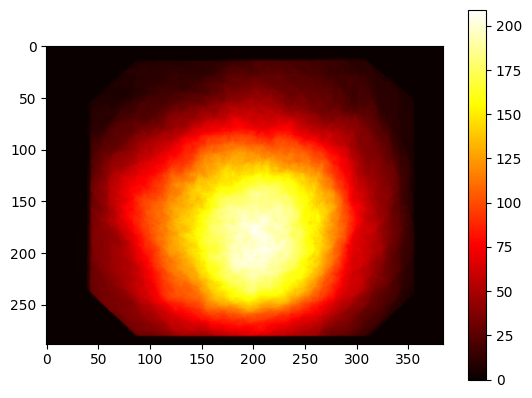

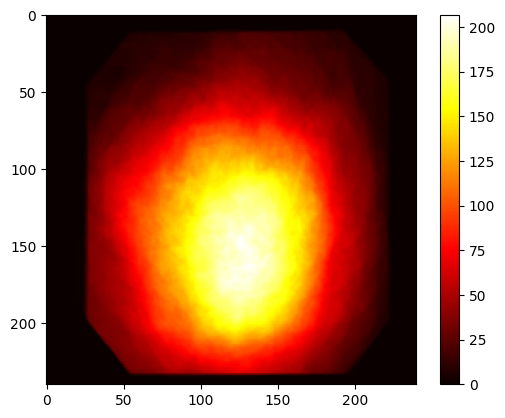

In [114]:
plot_heatmap(og_images_heatmap)
plot_heatmap(resize_images_heatmap)

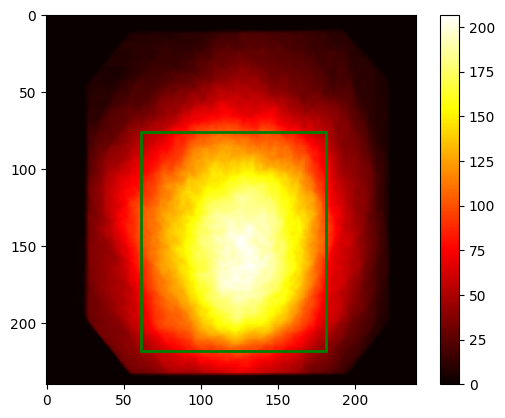

Surface area of the bounding box: 3894 / 57600 pixels


In [118]:
binarized_heatmap = binarize_input(torch.tensor(resize_images_heatmap))

bounding_box = cv2.boundingRect(binarized_heatmap.numpy().astype(np.uint8))

plot_heatmap(resize_images_heatmap, bounding_box)


surface_area = (bounding_box[2] - bounding_box[0]) * (bounding_box[3] - bounding_box[1])
print(f'Surface area of the bounding box: {surface_area} / {240 * 240} pixels')

In [59]:
from sklearn.decomposition import PCA, IncrementalPCA

def plot_pca_analysis(img, colored_lbl, mask_on=True):
    image_sum = img.sum(axis=2)
    print(image_sum.shape)

    image_bw = image_sum/image_sum.max()
    print(image_bw.max())

    pca = PCA()
    pca.fit(image_bw)

    # Getting the cumulative variance
    var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

    # How many PCs explain x% of the variance?
    var_threshold = 97.5
    # var_threshold = 70

    k = np.argmax(var_cumu>var_threshold)
    print(f"Number of components explaining {var_threshold}% variance: "+ str(k))

    plt.figure(figsize=[10,5])
    plt.title('Cumulative Explained Variance by the number of components')
    plt.ylabel('Cumulative Explained variance')
    plt.xlabel('Principal components')
    plt.axvline(x=k, color="k", linestyle="--")
    plt.axhline(y=var_threshold, color="r", linestyle="--")
    ax = plt.plot(var_cumu)
    plt.show()

    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
    image_recon = 255*(image_recon - image_recon.min())/(image_recon.max() - image_recon.min())

    remaining_var_img = image_bw - image_recon
    remaining_var_img = 255*(remaining_var_img - remaining_var_img.min())/(remaining_var_img.max() - remaining_var_img.min())

    # Plotting the reconstructed image
    fig, axes = plt.subplots(1,3, figsize=[12,8])
    for ax in axes:
        ax.set_axis_off()
    axes[0].imshow(image_recon) #cmap='gray')
    axes[0].set_title('Reconstructed Image from PCA')
    if mask_on:
        axes[0].imshow(colored_lbl, alpha=0.4)
    axes[1].imshow(remaining_var_img) #cmap='gray')
    axes[1].set_title('Remaining Variance Image')
    axes[2].imshow(img)
    axes[2].set_title('Original Image')
    plt.show()

(288, 384)
1.0
Number of components explaining 97.5% variance: 13


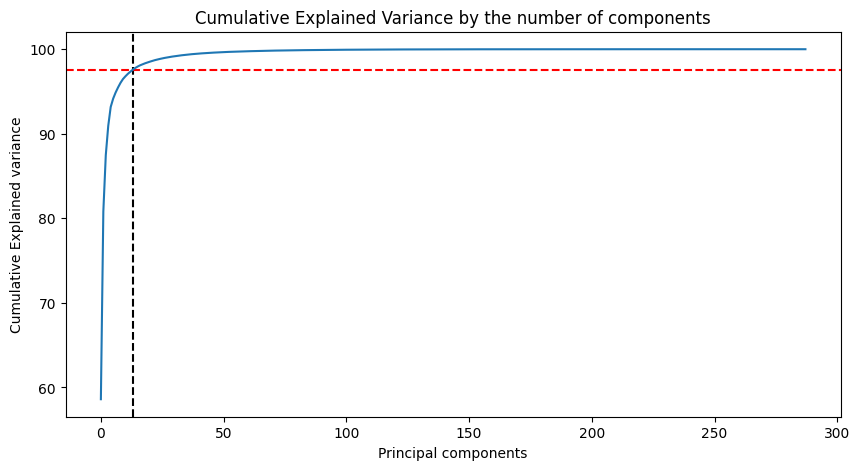

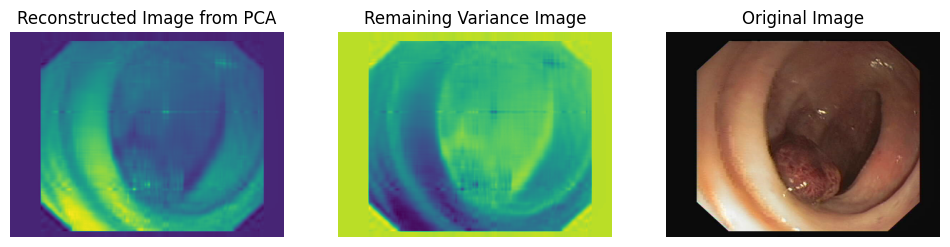

In [60]:
plot_pca_analysis(*entry_to_numpy(*dataset[9]), mask_on=False)

(288, 384)
1.0
Number of components explaining 97.5% variance: 18


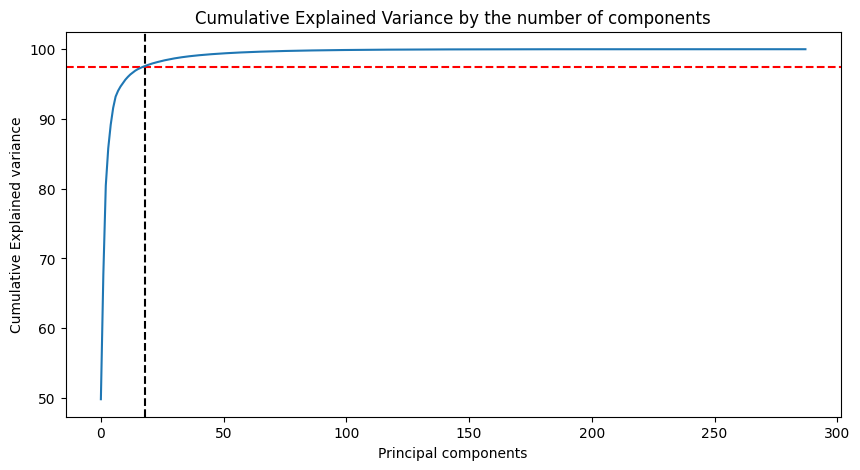

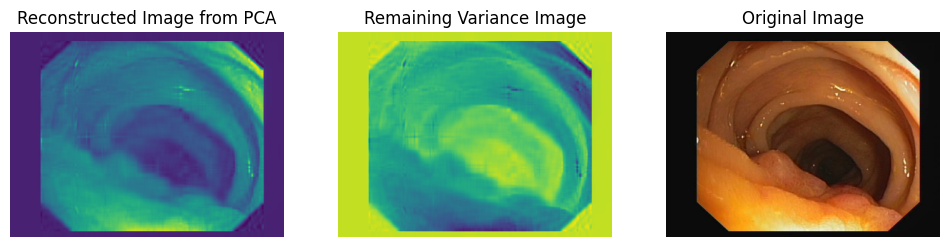

In [61]:
plot_pca_analysis(*entry_to_numpy(*dataset[2]), mask_on=False)

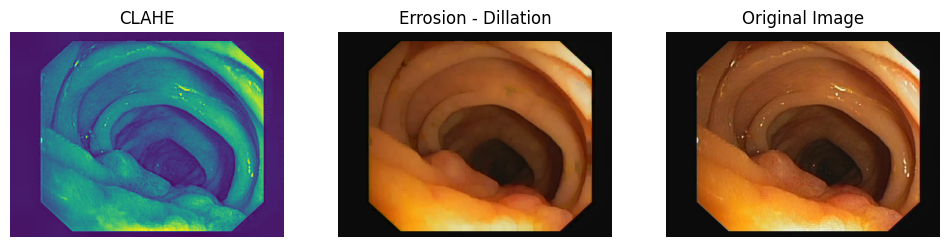

In [125]:
demo_img2, demo_lbl2 = dataset[2]

clahe_img = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
image_recon = clahe_img.apply(cv2.cvtColor(demo_img2.numpy().astype(np.uint8), cv2.COLOR_BGR2GRAY))

errode = cv2.erode(demo_img2.numpy().astype(np.uint8).astype(np.uint8), np.ones((3,3), np.uint8), iterations=3)
dilate = cv2.dilate(errode, np.ones((3,3), np.uint8), iterations=3)



fig, axes = plt.subplots(1,3, figsize=[12,8])
for ax in axes:
    ax.set_axis_off()
axes[0].imshow(image_recon) #cmap='gray')
axes[0].set_title('CLAHE')
axes[1].imshow(dilate) #cmap='gray')
axes[1].set_title('Errosion - Dillation')
axes[2].imshow(demo_img2.numpy().astype(np.uint8))
axes[2].set_title('Original Image')
plt.show()

In [62]:
print(f"Percentages of masked area 0: {image_stats['masked_area_percentage'][0]:.3f}%\nPercentages of masked area 2: {image_stats['masked_area_percentage'][2]:.3f}%")

Percentages of masked area 0: 23.465%
Percentages of masked area 2: 29.123%


### Split into train and validation

612 -> 50

x -> y

y = 50x/612

In [67]:
def compute_masked_area_percentage(dataset):
    masked_area_percentage = []
    for i in tqdm(range(len(dataset))):
        crt_img, crt_lbl = entry_to_numpy(*dataset[i])
        height, width = crt_img.shape[:2]
        masked_area_percentage.append(np.sum(crt_lbl > 0)/(width * height) * 100)
    return masked_area_percentage

def plot_masked_area_percentage_histogram(masked_area_percentage, no_bins=50):
    plt.hist(masked_area_percentage, bins=no_bins)
    plt.xticks(np.arange(0,55, 5))
    plt.xlim(0,50)
    plt.xlabel('Masked Area Percentage (%)')
    plt.ylabel('Number of Images')
    plt.title('Masked Area Percentage Histogram')
    # plt.show()

def analyze_train_val_distribution_split(train_dataset, val_dataset):
    map_train = compute_masked_area_percentage(train_dataset)
    map_val = compute_masked_area_percentage(val_dataset)

    plt.subplot(1,2,1)
    plot_masked_area_percentage_histogram(map_train, no_bins= 50)
    plt.title('Train Set')

    plt.subplot(1,2,2)
    plot_masked_area_percentage_histogram(map_val, no_bins= 50)
    plt.title('Validation Set')
    plt.show()

In [68]:
indices = list(range(length))
random.shuffle(indices)
print(indices[:10])

[522, 406, 349, 574, 321, 542, 96, 392, 188, 109]


In [69]:
train_dataset = [dataset[indices[i]] for i in range(0, 485)]
val_dataset = [dataset[indices[i]] for i in range(485, 612)]

100%|██████████| 127/127 [00:00<00:00, 4202.91it/s]


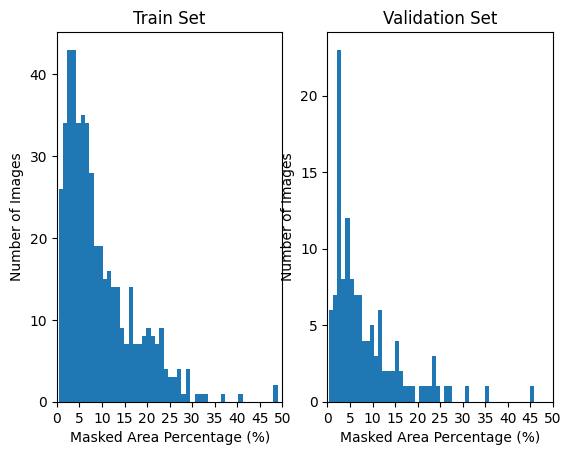

In [70]:
analyze_train_val_distribution_split(train_dataset, val_dataset)

In [55]:
os.mkdir('./train')
os.mkdir('./train/og')
os.mkdir('./train/mask')
os.mkdir('./val')
os.mkdir('./val/og')
os.mkdir('./val/mask')

In [71]:
path = './val/og/'
mask_path = './val/mask/'

# files = os.listdir(path)
# files = sorted(files, key=lambda x: int(x.split('.')[0]))

# for i in tqdm(range(len(files))):
#     os.rename(os.path.join(path, files[i]), os.path.join(path, str(i+1) + '.tif'))
#     os.rename(os.path.join(mask_path, files[i]), os.path.join(mask_path, str(i+1) + '.tif'))

In [72]:
files = os.listdir(path)
files = sorted(files, key=lambda x: int(x.split('.')[0]))

crt_idx = 0

for i in tqdm(range(len(files))):
    file_idx = int(files[i].split('.')[0])
    if file_idx - crt_idx > 1:
        print("Err: ", file_idx, crt_idx)
    else:
        crt_idx = file_idx

100%|██████████| 127/127 [00:00<00:00, 746045.67it/s]


(288, 384, 3)
(288, 384)


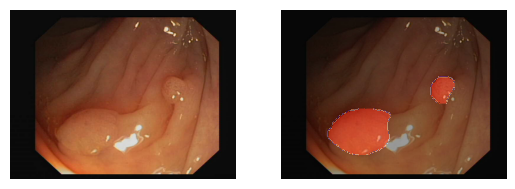

In [73]:
path = './val/og/114.tif'
mask_path = './val/mask/114.tif'
# mask_path = './pred/UNet/0_0.tif'

img = io.imread(path)
mask = io.imread(mask_path)
print(img.shape)
print(mask.shape)

plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(img)
# plt.subplot(1,2,2)
plt.imshow(mask, alpha=0.3, cmap='flag_r')
plt.axis('off')
plt.show()
# 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'